In [1]:
# not strictly necessary, but useful in the notebook
import torch
import numpy as np

In [21]:
# set visible cuda devices.
# first visible device will be set as default. Separate multiple devices by comma: ...=0,1,2
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


## Load graph

In [3]:
import pickle

# specify which graph to load
graph_name = "umap_example"

with open(f"graphs/{graph_name}.pickle", "rb") as f:
    graph = pickle.load(f)

## Plot loss

In [4]:
from plots import plot_loss
print(plot_loss.__doc__)


    Plot loss curve, including its course during the optimization.

    Black points below the curve indicate the positions of pivots that
    were directly optimized by autoneb.

    Parameters
    ----------
    graph : networkx.MultiGraph
        The graph created and optimized by autoneb.
    title : str, optional
        Optional title to be shown above the loss curve.
    save_as : str, optional
        If a name is given, the plot will be saved as .png, .svg and .pdf to
        the path "figures/loss/{save_as}.loss.pdf
    nodes : tuple, optional
        Tuple containing the names of two nodes. The plot will show the
        loss along the connection between the two.
    figsize : tuple, default=(8, 6)
        The total size of the figure in inches.
    


highest pivot:            80   highest loss: 3878.5556640625
left end:  3861.240478515625   right end: 3878.5556640625


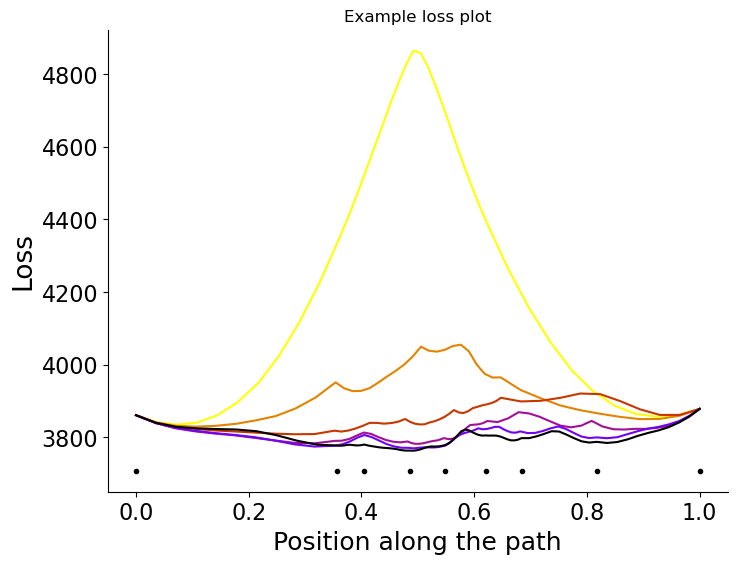

In [5]:
# example graph has 3 connected minima (nodes), so 2 of the nodes need to
# be selected for which to plot the loss of their connection
plot_loss(graph, title="Example loss plot", nodes=(1, 2))

## Load labels

In [6]:
# load dataset to use y_data for point colors
from torchvision import datasets
from torchvision.transforms import ToTensor

fashionmnist = datasets.FashionMNIST(
    root="datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

x_data = fashionmnist.data[:500]    # not needed for the visualizations
x_data = torch.flatten(x_data, start_dim=1) # x_data needs to be (N, 1)-dimensional

y_data = fashionmnist.targets[:500] # necessary to color points correctly

## Plot path

In [7]:
from plots import plot_embedding, plot_embeddings

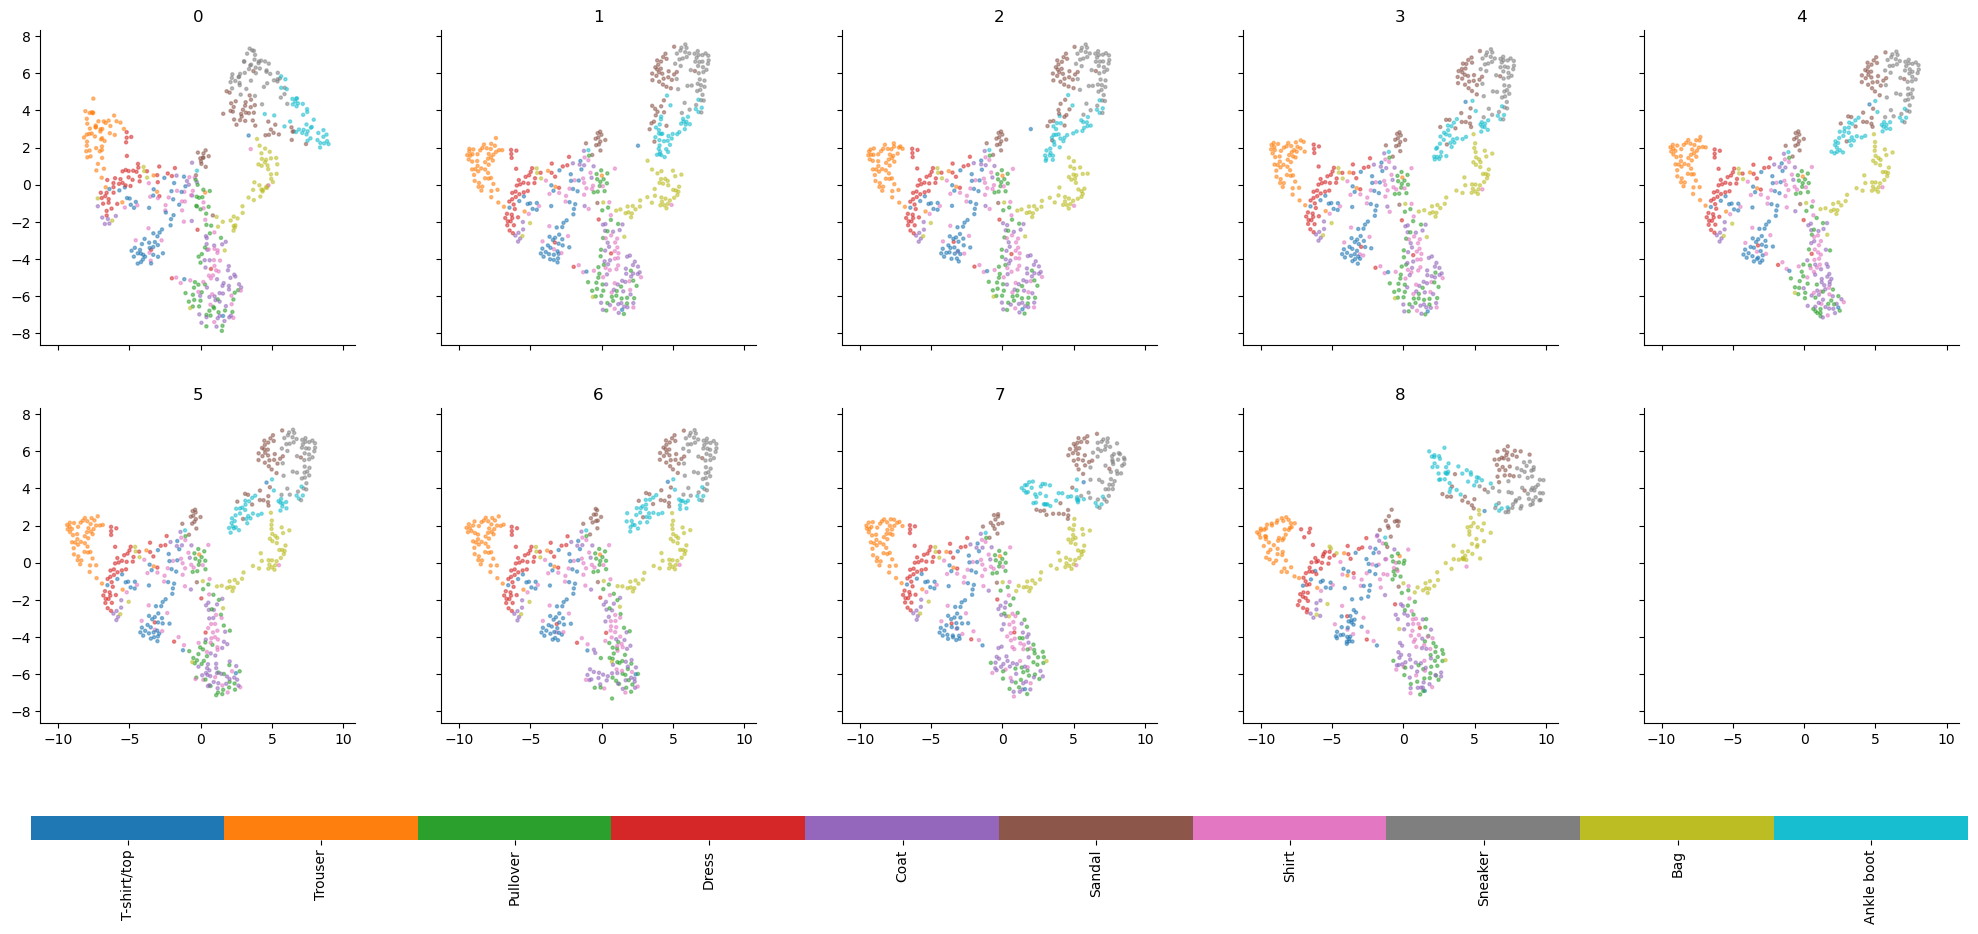

In [8]:
node1, node2 = 1, 2
connection_path = graph[node1][node2][max(list(graph[node1][node2]))]["path_coords"]
connection_path = connection_path.reshape((len(connection_path), 500, 2))

plot_embeddings(connection_path, y_data=y_data, columns=5, cmap="tab10", scatter_kwargs={"s":5}, labels=fashionmnist.classes)

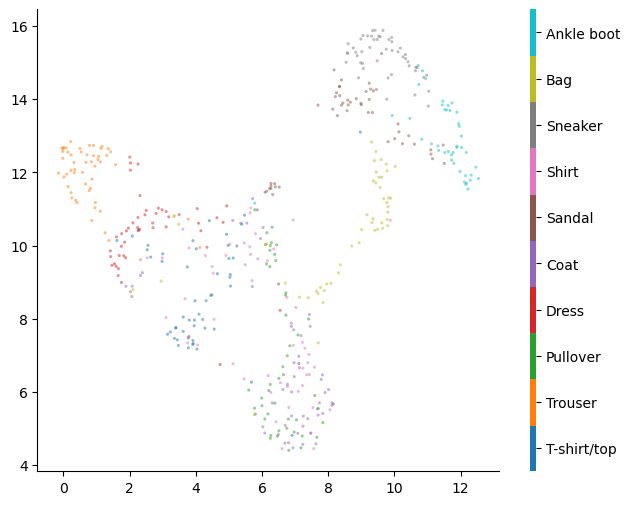

In [9]:
umap_embs = np.load("embeddings/UMAP_Fashion.npy")
plot_embedding(umap_embs[0], y_data=y_data, cmap="tab10", scatter_kwargs={"s":5}, labels=fashionmnist.classes, figsize=(8, 6))

## Animate path

In [13]:
from animate import create_animation

In [14]:
print(create_animation.__doc__)

Animate the connection between two nodes of the graph.
    
    Parameters
    ----------
    graph : networkx.MultiGraph
        The graph created by autoneb containing all nodes and connections.
    labels : np.ndarray or torch.Tensor
        The class label for each data point of an embedding.
    nodes : tuple, optional
        Tuple specifying for which nodes the connection should be animated.
    interpolate : int, default=3
        Number defining how many frames will be created for each point along the path,
        starting with the path point and interpolating to the next point.
        interpolate=1 means only showing actual path points without interpolating.
    center : float, default=(0, 0)
        Coordinates of the center of the animation.
    lim : int or float, default = 50
        Animation will be cropped to the range -lim to +lim, relative to center.
    cmap : matplotlib colormap or str, default="nipy_spectral"
        Either a colormap of choice is passed directl

Node cycle: 1 -> 2 -> 3 -> 1


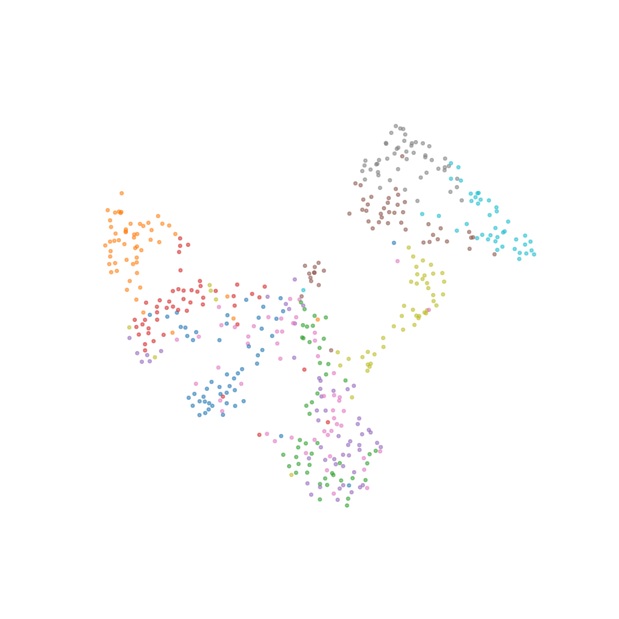

In [15]:
# create the animation object, use preview plot below to adjust parameters
animation = create_animation(graph, labels=y_data.to(device="cuda:0"), lim=12, cmap="tab10", scatter_kwargs={"s":5})

In [12]:
# save the animation to the specified path
animation.save('animations/umap_example_animation.gif', dpi=100, writer='imagemagick')

Frame 97/97

## Color point-wise loss contribution

Point-wise loss is only implemented for UMAP

In [17]:
from losses import UMAP_loss

fashion_UMAP_loss = UMAP_loss(x_data, y_data) # takes some time when using the whole dataset, as
                                              # one example umap embedding needs to be optimized

UMAP_loss initialized successfully


In [18]:
from plots import plot_pointwise

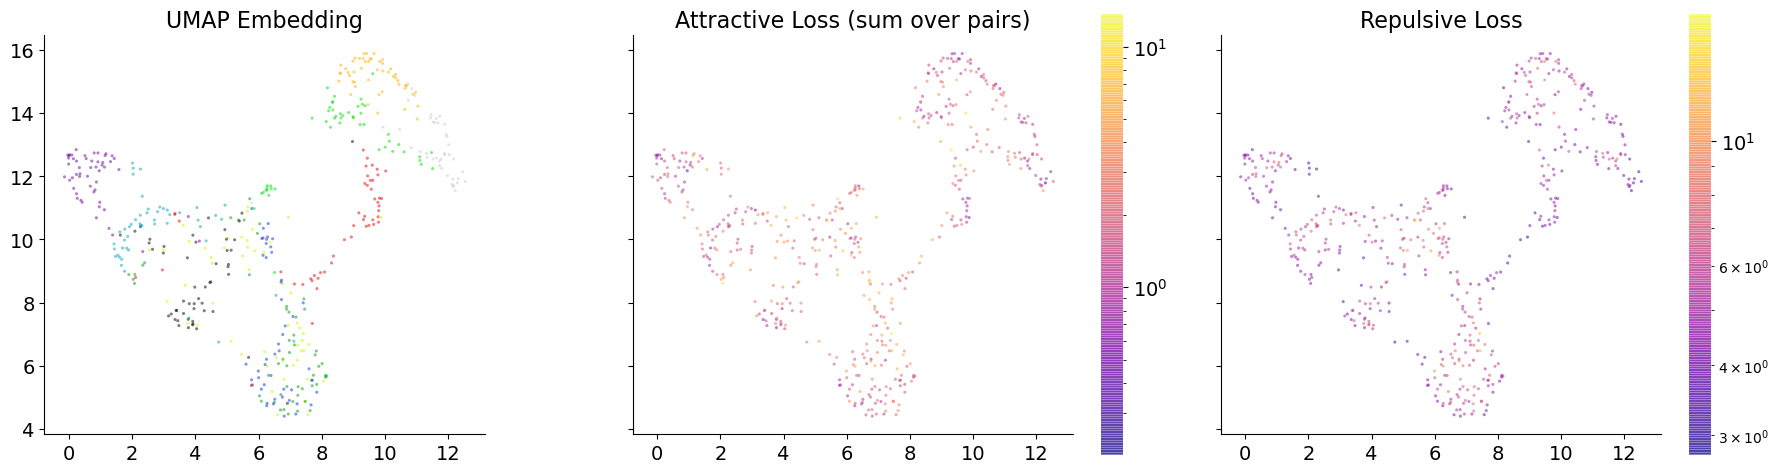

In [20]:
plot_pointwise(umap_embs[0], y_data, fashion_UMAP_loss, att_clip=(0.01, 40), plot_std=True, plot_att=True, plot_rep=True, scatter_kwargs={"s":5})